#  <span style="color:orange">Regresión. Nivel Principiante</span>

**Creado utilizando: PyCaret 2.0** <br />
Fuente: https://pycaret.org/

En este tutorial aprenderemos:

* **Obtención de datos:** Cómo importar datos desde el repositorio de PyCaret
* **Configuración del entorno:** Cómo configurar un experimento en PyCaret y comenzar a construir modelos de regresión
* **Crear modelo:** Cómo crear un modelo, realizar validaciones cruzadas y evaluar métricas de regresión
* **Ajustar modelo:** Cómo ajustar automáticamente los hiperparámetros de un modelo de regresión
* **Plot Model:** Cómo analizar el rendimiento del modelo utilizando varios gráficos
* **Finalizar modelo:** Cómo finalizar el mejor modelo al final del experimento
* **Modelo de predicción:** Cómo hacer predicciones sobre datos nuevos / no vistos
* **Guardar / Cargar modelo:** Cómo guardar / cargar un modelo para uso futuro

# 2.0 ¿Qué es la regresión?

El análisis de regresión es un conjunto de procesos estadísticos para estimar las relaciones entre una variable dependiente ('variable de resultado' o 'objetivo') y una o más variables independientes ('características'). El objetivo de la regresión en el aprendizaje automático es predecir valores continuos como monto de ventas, cantidad, temperatura, etc.


# 3.0 Descripción general del módulo de regresión en PyCaret

El módulo de regresión de PyCaret (`pycaret.regression`) es un módulo de aprendizaje automático supervisado que se utiliza para predecir valores / resultados continuos utilizando diversas técnicas y algoritmos. La regresión se puede utilizar para predecir valores / resultados como ventas, unidades vendidas, temperatura o cualquier número que sea continuo.

El módulo de regresión de PyCaret tiene más de 25 algoritmos y 10 gráficos para analizar el rendimiento de los modelos. Ya sea ajuste de hiperparámetros, conjuntos o técnicas avanzadas como apilamiento, el módulo de regresión de PyCaret lo tiene todo.

# 4.0 Información del Dadtaset

Para este tutorial usaremos un conjunto de datos basado en un caso llamado **"Sarah Gets a Diamond"**. La base de los datos es un caso sobre un estudiante de MBA romántico desesperado que elige el diamante adecuado para su futura esposa, Sarah. Los datos contienen 6000 registros para entrenamiento. Las descripciones de cada columna son las siguientes:

- **ID:** Identifica de forma única cada observación (diamante)
- **Peso en quilates:** El peso del diamante en quilates métricos. Un quilate equivale a 0,2 gramos, aproximadamente el mismo peso que un clip
- **Corte:** Uno de los cinco valores que indican el corte del diamante en el siguiente orden de deseabilidad (Firma-Ideal, Ideal, Muy bueno, Bueno, Regular)
- **Color:** Uno de los seis valores que indican el color del diamante en el siguiente orden de conveniencia (D, E, F - Incoloro, G, H, I - Casi incoloro)
- **Claridad:** Uno de los siete valores que indican la claridad del diamante en el siguiente orden de deseabilidad (F - impecable, IF - internamente impecable, VVS1 o VVS2 - muy, muy ligeramente incluido, o VS1 o VS2 - muy ligeramente incluido, SI1 - Ligeramente incluido)
- **Pulido:** Uno de los cuatro valores que indican el pulido del diamante (ID - Ideal, EX - Excelente, VG - Muy bueno, G - Bueno)
- **Simetría:** Uno de los cuatro valores que indican la simetría del diamante (ID - Ideal, EX - Excelente, VG - Muy bueno, G - Bueno)
- **Informe:** Uno de los dos valores "AGSL" o "GIA" que indica qué agencia de clasificación informó las cualidades de los diamantes.
- **Precio:** La cantidad en USD que el diamante se valora como "Columna de destino"


#### Reconocimiento del conjunto de datos:
Este caso fue preparado por Greg Mills (MBA '07) bajo la supervisión de Phillip E. Pfeifer, profesor investigador exalumno de administración de empresas. Copyright (c) 2007 de la Fundación de la Escuela Darden de la Universidad de Virginia, Charlottesville, VA. Todos los derechos reservados.


In [ ]:
!pip install pycaret

# 5.0 Obteniendo los datos

In [ ]:
from pycaret.datasets import get_data
dataset = get_data('diamond')

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.10,Ideal,H,SI1,VG,EX,GIA,5169
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3470
2,0.85,Ideal,H,SI1,EX,EX,GIA,3183
3,0.91,Ideal,E,SI1,VG,VG,GIA,4370
4,0.83,Ideal,G,SI1,EX,EX,GIA,3171


In [ ]:
#check the shape of data
dataset.shape

(6000, 8)

Para demostrar la función `predict_model ()` en datos no vistos, se ha retenido una muestra de 600 registros del conjunto de datos original para su uso en predicciones. Esto no debe confundirse con una división de tren / prueba, ya que esta división en particular se realiza para simular un escenario de la vida real. Otra forma de pensar en esto es que estos 600 registros no están disponibles en el momento en que se realizó el experimento de aprendizaje automático.

In [ ]:
data = dataset.sample(frac=0.9, random_state=786)
data_unseen = dataset.drop(data.index)

# Dropping the indexes to avoid index problems.
data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (5400, 8)
Unseen Data For Predictions: (600, 8)


# 6.0 Configuración del entorno en PyCaret

La función `setup ()` inicializa el entorno en pycaret y crea la tubería de transformación para preparar los datos para el modelado y la implementación. Se debe llamar a `setup ()` antes de ejecutar cualquier otra función en pycaret. Se necesitan dos parámetros obligatorios: un marco de datos de pandas y el nombre de la columna de destino. Todos los demás parámetros son opcionales y se utilizan para personalizar la canalización de preprocesamiento (los veremos en tutoriales posteriores).


In [ ]:
# Since this is a regression problem, pycaret.regression is imported
# data = dataframe to use.
# target = variable or classification to predict (column in dataframe).
# session_id = session name.

# Las fases adicionales que se indiquen en setup(), aparecerán en el 
# output resaltadas de color verde. Sin embargo, como este es un pre-
# procesamiento básico, no se mostrarán filas resaltadas de verde.

from pycaret.regression import *
exp_reg101 = setup(data = data, target = 'Price', session_id=123) 

 
Setup Succesfully Completed.


,Description,Value
0,session_id,123
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(5400, 8)"
4,Missing Values,False
5,Numeric Features,1
6,Categorical Features,6
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


En **_Ordinal Features_** se nos indica que no hay datos categóricos ordinales, siendo esto falso puesto que las columnas **Corte, Color, Claridad, Pulido y Simetría** son ordinales.

Una vez que la configuración se ha ejecutado con éxito, imprime la cuadrícula de información que contiene varias piezas importantes de información. La mayor parte de la información está relacionada con la tubería de preprocesamiento que se construye cuando se ejecuta `setup ()`.

Observe cómo algunas tareas que son imperativas para realizar el modelado se manejan automáticamente, como la imputación de valores perdidos (en este caso, no hay valores perdidos en los datos de entrenamiento, pero aún necesitamos imputadores para los datos invisibles), codificación categórica, etc. Los parámetros en `setup ()` son opcionales y se utilizan para personalizar la canalización de preprocesamiento. 

# 7.0 Comparación de todos los modelos

Comparar todos los modelos para evaluar el rendimiento es el punto de partida recomendado para el modelado una vez que se completa la configuración (a menos que sepa exactamente qué tipo de modelo necesita, que a menudo no es el caso). Esta función entrena todos los modelos en la biblioteca de modelos y los califica mediante la validación cruzada de k veces para la evaluación de métricas. La salida imprime una cuadrícula de puntuación que muestra el promedio MAE, MSE, RMSE, R2, RMSLE y MAPE entre los pliegues (10 por defecto) junto con el tiempo de entrenamiento.

In [ ]:
best = compare_models(exclude = ['ransac'])
# fold = Número de veces que se hace la validación cruzada

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
0,CatBoost Regressor,626.8852,2167206.4646,1393.4210,0.9797,0.0671,0.0490,4.8512
1,Extra Trees Regressor,755.9566,2756642.5198,1604.2591,0.9732,0.0819,0.0607,0.7705
2,Light Gradient Boosting Machine,752.2357,3055569.4004,1687.7770,0.9711,0.0773,0.0567,0.2089
3,Random Forest,762.0579,2969421.3714,1671.9701,0.9711,0.0817,0.0597,0.7900
4,Extreme Gradient Boosting,932.7974,3534049.4485,1855.3299,0.9652,0.1061,0.0801,0.4532
5,Gradient Boosting Regressor,919.7893,3751333.9600,1898.2498,0.9634,0.1024,0.0770,0.6529
6,Decision Tree,998.2558,5292680.3084,2225.8934,0.9479,0.1078,0.0773,0.0392
7,Ridge Regression,2413.5865,14120531.3503,3726.1698,0.8621,0.6689,0.2875,0.0069
8,Linear Regression,2415.3897,14237918.8368,3743.6008,0.8608,0.6876,0.2872,0.0121
9,Lasso Regression,2412.1923,14246796.4091,3744.2303,0.8608,0.6767,0.2866,0.0824


Para ver más información de las métricas, ver el siguiente [artículo](https://sitiobigdata.com/2019/05/27/modelos-de-machine-learning-metricas-de-regresion-mse-parte-2/#)

Dos simples palabras de código *** (ni siquiera una línea) *** han entrenado y evaluado más de 20 modelos mediante validación cruzada. La tabla destaca la métrica de mayor rendimiento solo con fines comparativos. La tabla por defecto se ordena usando `R2` (de mayor a menor) que se puede cambiar pasando el parámetro` sort`. Por ejemplo, compare_models (sort = 'RMSLE') ordenará la cuadrícula por RMSLE (de menor a mayor, ya que menor es mejor). 
Si desea cambiar el parámetro de evaluación cruzada (fold) de "10" a un valor diferente, puede utilizar el parámetro de "fold". Por ejemplo, "compare_models (fold = 5)" comparará todos los modelos en una validación cruzada de 5 veces. Reducir el número de folds mejorará el tiempo de entrenamiento. De forma predeterminada, compare_models devuelve el modelo de mejor rendimiento basado en el orden de clasificación predeterminado, pero se puede usar para devolver una lista de los N mejores modelos mediante el parámetro `n_select`. </br>

Observe cómo se usa el parámetro `blacklist` para bloquear ciertos modelos (en este caso,` RANSAC`). En la próxima versión de PyCaret `2.1`, el parámetro` blacklist` se reemplaza con el término ʻexclude` y el parámetro `whitelist` se reemplazará con el término ʻinclude`.

# 8.0 Crea un modelo

`create_model` es la función más granular en PyCaret y, a menudo, es la base detrás de la mayoría de las funcionalidades de PyCaret. Como su nombre indica, esta función entrena y evalúa un modelo mediante la validación cruzada que se puede configurar con el parámetro fold. La salida imprime una cuadrícula de puntuación que muestra MAE, MSE, RMSE, R2, RMSLE y MAPE por pliegue.

En la parte restante de este tutorial, trabajaremos con los modelos siguientes como modelos candidatos. Las selecciones son solo para fines ilustrativos y no necesariamente significan que sean las de mejor rendimiento o ideales para este tipo de datos.

- AdaBoost Regressor ('ada')
- Máquina de aumento de gradiente de luz ('lightgbm')
- Árbol de decisión ('dt')

Hay 25 regresores disponibles en la biblioteca de modelos de PyCaret. Para ver la lista de todos los regresores, consulte la cadena de documentos o use la función `modelos` para ver la biblioteca.

In [ ]:
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model.Lasso,True
ridge,Ridge Regression,sklearn.linear_model.Ridge,True
en,Elastic Net,sklearn.linear_model.ElasticNet,True
lar,Least Angle Regression,sklearn.linear_model.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model.OMP,True
br,Bayesian Ridge,sklearn.linear_model.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model.ARDRegression,False


### 8.1 AdaBoost Regressor

In [ ]:
#n 10 fold by default
ada = create_model('ada')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,3976.3115,22638336.5317,4757.9761,0.7515,0.4660,0.5272
1,4238.2412,29522153.3063,5433.4292,0.7737,0.4911,0.5660
2,4409.9848,24626666.3376,4962.5262,0.7741,0.5269,0.6318
3,4201.9811,22493390.2282,4742.7197,0.7518,0.4935,0.5741
4,3623.3398,23358876.5338,4833.1022,0.7087,0.4527,0.5011
5,4565.6610,29732993.3263,5452.7968,0.7462,0.5462,0.6598
6,4684.0814,28516379.6188,5340.0730,0.7321,0.5567,0.6716
7,4446.0672,27422298.8102,5236.6305,0.6532,0.5217,0.6138
8,3870.3897,20611456.9747,4539.9842,0.7976,0.4664,0.5264
9,3667.6258,20126723.1218,4486.2817,0.8084,0.4869,0.5520


In [ ]:
print(ada)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=123)


### 8.2 Light Gradient Boosting Machine 

In [ ]:
lightgbm = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,625.1813,1051762.9578,1025.5550,0.9885,0.0715,0.0526
1,797.6185,5638866.1771,2374.6297,0.9568,0.0727,0.0537
2,825.0215,3318727.1968,1821.7374,0.9696,0.0857,0.0616
3,720.3923,1697211.3816,1302.7707,0.9813,0.0714,0.0554
4,645.6800,1799949.1196,1341.6218,0.9775,0.0745,0.0534
5,830.7176,6423604.0184,2534.4830,0.9452,0.0810,0.0567
6,800.2611,3355855.9955,1831.8996,0.9685,0.0793,0.0585
7,714.3607,1930222.6458,1389.3245,0.9756,0.0732,0.0556
8,784.7648,2211933.1546,1487.2569,0.9783,0.0766,0.0582
9,778.3590,3127561.3571,1768.4913,0.9702,0.0872,0.0609


### 8.3 Decision Tree

In [ ]:
dt = create_model('dt')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,871.1696,2539229.9157,1593.4961,0.9721,0.0987,0.0720
1,1147.0397,10230393.4634,3198.4986,0.9216,0.1079,0.0766
2,923.4280,2887069.6454,1699.1379,0.9735,0.1005,0.0744
3,1019.6337,4493663.0927,2119.8262,0.9504,0.1065,0.0773
4,1109.0019,9374845.7114,3061.8370,0.8831,0.1185,0.0833
5,1070.6609,7961620.3151,2821.6343,0.9320,0.1124,0.0813
6,988.0220,4026193.9849,2006.5378,0.9622,0.1060,0.0781
7,842.4033,2075226.6798,1440.5647,0.9738,0.0972,0.0730
8,963.7586,4253092.9747,2062.3028,0.9582,0.1044,0.0727
9,1047.4405,5085467.3011,2255.0981,0.9516,0.1255,0.0845


# 9.0 Optimización del Modelo

Cuando se crea un modelo usando la función `create_model`, usa los hiperparámetros predeterminados para entrenar el modelo. Para ajustar los hiperparámetros, se utiliza la función `tune_model`. Esta función sintoniza automáticamente los hiperparámetros de un modelo usando "Random Grid Search" en un espacio de búsqueda predefinido. La salida imprime una cuadrícula de puntuación que muestra MAE, MSE, RMSE, R2, RMSLE y MAPE por pliegue. Para utilizar la cuadrícula de búsqueda personalizada, puede pasar el parámetro `custom_grid` en la función` tune_model`

### 9.1 AdaBoost Regressor

In [ ]:
tuned_ada = tune_model(ada)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2799.3407,16439032.0308,4054.5076,0.8195,0.2896,0.2728
1,2966.6977,23597057.7619,4857.6803,0.8192,0.3131,0.2983
2,2566.6406,15658252.5578,3957.0510,0.8564,0.2610,0.2364
3,2602.3745,14383448.2182,3792.5517,0.8413,0.2709,0.2326
4,2583.1811,14185346.1705,3766.3439,0.8231,0.3012,0.2757
5,2739.3273,20428026.4570,4519.7374,0.8257,0.3061,0.2866
6,2776.9122,17107851.9502,4136.1639,0.8393,0.3053,0.2834
7,2888.0504,17889532.1511,4229.6019,0.7738,0.3114,0.2962
8,2639.0625,15672432.4243,3958.8423,0.8461,0.3050,0.2815
9,2620.6692,16400041.6306,4049.6965,0.8438,0.3131,0.2951


In [ ]:
print(tuned_ada)

AdaBoostRegressor(base_estimator=None, learning_rate=0.1, loss='exponential',
                  n_estimators=110, random_state=123)


### 9.2 Light Gradient Boosting Machine

In [ ]:
# The following matrix conatins the hyperparameters to train the model,
# if not, the custom_grid will make a cutrom gri research. 
import numpy as np
lgbm_params = {'num_leaves': np.arange(10,200,10),
                        'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)],
                        'learning_rate': np.arange(0.1,1,0.1)
                        }

In [ ]:
tuned_lightgbm = tune_model(lightgbm, custom_grid = lgbm_params)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,733.2214,1464748.5361,1210.2680,0.9839,0.0892,0.0646
1,840.4463,2888551.4272,1699.5739,0.9779,0.0851,0.0615
2,849.6549,2889877.5013,1699.9640,0.9735,0.0933,0.0685
3,776.6915,1848027.8385,1359.4219,0.9796,0.0815,0.0618
4,835.3916,3506099.9656,1872.4583,0.9563,0.0948,0.0659
5,832.9681,4295831.4477,2072.6388,0.9633,0.0860,0.0651
6,839.3671,2728995.5293,1651.9672,0.9744,0.0854,0.0638
7,910.5734,3803403.3788,1950.2316,0.9519,0.0937,0.0684
8,850.0181,2616323.5939,1617.5054,0.9743,0.0852,0.0644
9,792.2154,3304799.7438,1817.9108,0.9685,0.0965,0.0649


In [ ]:
print(tuned_lightgbm)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.7000000000000001,
              max_depth=90, min_child_samples=20, min_child_weight=0.001,
              min_split_gain=0.0, n_estimators=100, n_jobs=-1, num_leaves=10,
              objective=None, random_state=123, reg_alpha=0.0, reg_lambda=0.0,
              silent=True, subsample=1.0, subsample_for_bin=200000,
              subsample_freq=0)


### 9.3 Decision Tree

In [ ]:
tuned_dt = tune_model(dt)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,934.9213,3637475.4401,1907.2167,0.9601,0.0965,0.0751
1,1016.3795,6295426.0355,2509.0688,0.9518,0.1012,0.0750
2,888.6061,2887457.8482,1699.2521,0.9735,0.0990,0.0734
3,899.5514,3106659.0817,1762.5717,0.9657,0.0993,0.0739
4,1058.6666,8213834.5359,2865.9788,0.8976,0.1185,0.0804
5,1061.3095,8084798.8028,2843.3781,0.9310,0.1105,0.0745
6,880.2731,2693970.8756,1641.3320,0.9747,0.0941,0.0716
7,909.6749,3504336.0198,1871.9872,0.9557,0.0972,0.0713
8,990.9343,3830000.8804,1957.0388,0.9624,0.1036,0.0762
9,1038.9525,5476260.4232,2340.1411,0.9479,0.1143,0.0795


De forma predeterminada, `tune_model` optimiza` R2` pero esto se puede cambiar usando el parámetro de optimización. Por ejemplo: tune_model (dt, optimizar = 'MAE') buscará los hiperparámetros de un regresor de árbol de decisión que dé como resultado el "MAE" más bajo en lugar del "R2" más alto. 

Las métricas por sí solas no son los únicos criterios que debe considerar al finalizar el mejor modelo de producción. Otros factores a considerar incluyen el tiempo de entrenamiento, la desviación estándar de la validación cruzada, etc. 

# 10.0 Análisis de los resultados

Antes de la finalización del modelo, la función `plot_model ()` se puede utilizar para analizar el rendimiento en diferentes aspectos como el gráfico de residuos, el error de predicción, la importancia de la característica, etc. Esta función toma un objeto de modelo entrenado y devuelve un gráfico basado en la prueba / retención -comienzo.

Hay más de 10 parcelas disponibles, consulte la cadena de documentos `plot_model ()` para ver la lista de parcelas disponibles.

### 10.1 Residual Plot

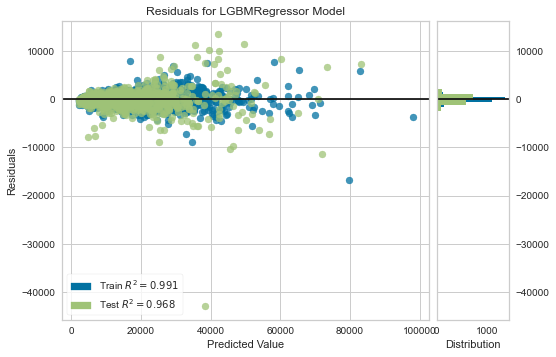

In [ ]:
plot_model(tuned_lightgbm)

Se puede apreciar que el $R^2$, tanto del conjunto de entranamiento como el de test, son muy similares, por lo tanto, nuestro modelo es bueno.

### 10.2 Prediction Error Plot

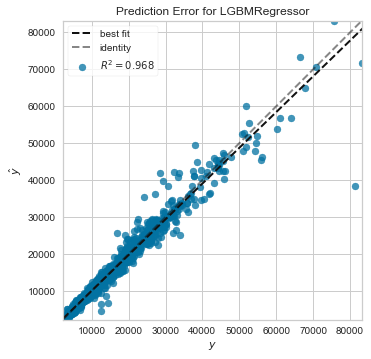

In [ ]:
plot_model(tuned_lightgbm, plot = 'error')

Como el $R^2$ es muy cercano a uno, el modelo es muy bueno.

### 10.3 Feature Importance Plot

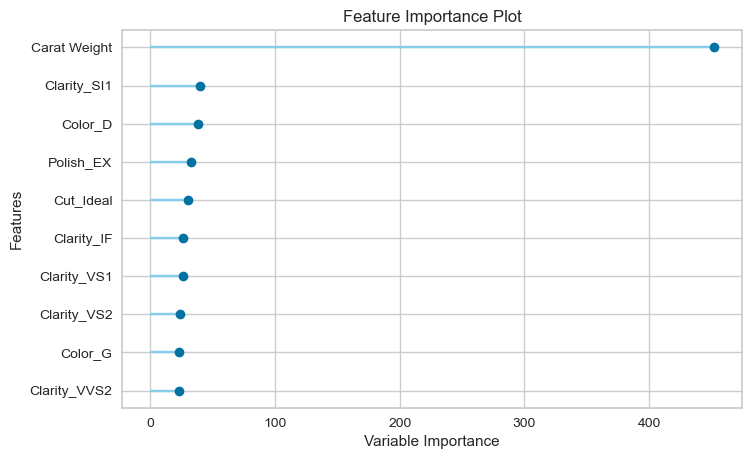

In [ ]:
plot_model(tuned_lightgbm, plot='feature')

De esto se aprecia que las carecterísticas importantes para el modelo son **Carat Weight** y después **Clarity_SI 1**.

Otra forma de analizar el rendimiento de los modelos es utilizar la función ʻevaluate_model () `que muestra una interfaz de usuario para todos los gráficos disponibles para un modelo dado. Utiliza internamente la función `plot_model ()`.

In [ ]:
evaluate_model(tuned_lightgbm)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

# 11.0 Predecir en la muestra de test

Antes de finalizar el modelo, es aconsejable realizar una verificación final prediciendo el conjunto de prueba / test y revisando las métricas de evaluación. Si observa la cuadrícula de información en la Sección 6 anterior, verá que el 30% (1621 muestras) de los datos se han separado como una muestra de test. Todas las métricas de evaluación que hemos visto anteriormente son el resultado de la validación cruzada basados únicamente en el conjunto de entrenamiento (70%). Ahora, usando nuestro modelo entrenado almacenado en la variable `tuned_lightgbm` predeciremos la muestra de test y evaluaremos las métricas para ver si son materialmente diferentes a los resultados del CV.

In [ ]:
predict_model(tuned_lightgbm);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,815.5947,3.533081e+06,1879.6493,0.9678,0.0926,0.0627


El R2 en el conjunto de prueba / retención es **`0.9678`** en comparación con **`0.9704`** logrado en los resultados de CV de `tuned_lightgbm` (en la sección 9.2 anterior). Esta no es una diferencia significativa. Si hay una gran variación entre los resultados de prueba / retención y CV, esto normalmente indicaría un ajuste excesivo, pero también podría deberse a varios otros factores y requeriría una mayor investigación. En este caso, avanzaremos con la finalización del modelo y la predicción sobre datos no vistos (el 10% que habíamos separado al principio y nunca expuesto a PyCaret).

(SUGERENCIA: Siempre es bueno observar la desviación estándar de los resultados de CV cuando se usa `create_model`).

# 12.0 Finalizacion del modelo para el despliegue

La finalización del modelo es el último paso del experimento. Un flujo de trabajo de aprendizaje automático normal en PyCaret comienza con `setup ()`, seguido de la comparación de todos los modelos usando `compare_models ()` y preseleccionando algunos modelos candidatos (basados en la métrica de interés) para realizar varias técnicas de modelado como el ajuste de hiperparámetros, ensamblaje, apilamiento, etc. Este flujo de trabajo eventualmente lo llevará al mejor modelo para usar en la realización de predicciones sobre datos nuevos y no vistos. La función `finalize_model ()` ajusta el modelo al conjunto de datos completo, incluida la muestra de prueba / reserva (30% en este caso). El propósito de esta función es entrenar el modelo en el conjunto de datos completo antes de implementarlo en producción.

In [ ]:
final_lightgbm = finalize_model(tuned_lightgbm)

In [ ]:
print(final_lightgbm)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.7000000000000001,
              max_depth=90, min_child_samples=20, min_child_weight=0.001,
              min_split_gain=0.0, n_estimators=100, n_jobs=-1, num_leaves=10,
              objective=None, random_state=123, reg_alpha=0.0, reg_lambda=0.0,
              silent=True, subsample=1.0, subsample_for_bin=200000,
              subsample_freq=0)


**Precaución:** Una última palabra de advertencia. Una vez que el modelo se finaliza usando `finalize_model ()`, el conjunto de datos completo, incluido el conjunto de prueba / retención, se usa para el entrenamiento. Como tal, si el modelo se usa para predicciones en el conjunto de reserva después de usar `finalize_model ()`, la cuadrícula de información impresa será engañosa ya que está tratando de predecir en los mismos datos que se usaron para modelar.

In [ ]:
predict_model(final_lightgbm);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,563.6509,1.128173e+06,1062.1547,0.9897,0.0672,0.0494


Observe cómo el R2 en `final_lightgbm` ha aumentado a **`0.9897`** desde **`0.9678`**, aunque el modelo es el mismo. Esto se debe a que la variable `final_lightgbm` se entrena en el conjunto de datos completo, incluido el conjunto de prueba / retención.

# 13.0 Validación del modelo: predicción con datos no vistos

La función `predict_model ()` también se usa para predecir en el conjunto de datos no visto. La única diferencia con la sección 11 anterior es que esta vez pasaremos el parámetro `data_unseen`. `data_unseen` es la variable creada al comienzo del tutorial y contiene el 10% (600 muestras) del conjunto de datos original que nunca estuvo expuesto a PyCaret

In [ ]:
unseen_predictions = predict_model(final_lightgbm, data=data_unseen)
unseen_predictions.head()

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price,Label
index,,,,,,,,,
0,1.53,Ideal,E,SI1,ID,ID,AGSL,12791,13726.0144
1,1.50,Fair,F,SI1,VG,VG,GIA,10450,9832.7325
2,1.01,Good,E,SI1,G,G,GIA,5161,5084.2239
3,2.51,Very Good,G,VS2,VG,VG,GIA,34361,34806.0152
4,1.01,Good,I,SI1,VG,VG,GIA,4238,4070.4143


La columna `Etiqueta` se agrega al conjunto` data_unseen`. La etiqueta es el valor predicho utilizando el modelo `final_lightgbm`. Si desea redondear las predicciones, puede usar el parámetro `round` dentro de` predict_model () `. También puede verificar las métricas sobre esto, ya que tiene disponible la columna objetivo real "Precio". Para hacer eso usaremos el módulo pycaret.utils. Vea el ejemplo a continuación:

In [ ]:
from pycaret.utils import check_metric
check_metric(unseen_predictions.Price, unseen_predictions.Label, 'R2')

0.9776

# 14.0 Guardar el modelo

Ahora hemos terminado el experimento finalizando el modelo `tuned_lightgbm` que ahora está almacenado en la variable` final_lightgbm`. También hemos utilizado el modelo almacenado en `final_lightgbm` para predecir` data_unseen`. Esto nos lleva al final de nuestro experimento, pero aún queda una pregunta por hacer: ¿Qué sucede cuando tiene más datos nuevos para predecir? ¿Tienes que volver a realizar todo el experimento? La respuesta es no, la función incorporada de PyCaret `save_model ()` le permite guardar el modelo junto con todo el proceso de transformación para su uso posterior.

In [ ]:
save_model(final_lightgbm,'Final Lightgbm Model 08Feb2020')

Transformation Pipeline and Model Succesfully Saved


(SUGERENCIA: Siempre es bueno usar la fecha en el nombre del archivo al guardar modelos, es bueno para el control de versiones).

# 15.0 Cargando el modelo guardado

Para cargar un modelo guardado en una fecha futura en el mismo entorno o en uno alternativo, usaríamos la función `load_model ()` de PyCaret y luego aplicaríamos fácilmente el modelo guardado en nuevos datos no vistos para la predicción.

In [ ]:
saved_final_lightgbm = load_model('Final Lightgbm Model 08Feb2020')

Transformation Pipeline and Model Successfully Loaded


Una vez que el modelo está cargado en el entorno, simplemente puede usarlo para predecir cualquier dato nuevo usando la misma función `predict_model ()`. A continuación, hemos aplicado el modelo cargado para predecir el mismo "data_unseen" que usamos en la sección 13 anterior.

In [ ]:
new_prediction = predict_model(saved_final_lightgbm, data=data_unseen)

In [ ]:
new_prediction.head()

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price,Label
index,,,,,,,,,
0,1.53,Ideal,E,SI1,ID,ID,AGSL,12791,13726.0144
1,1.50,Fair,F,SI1,VG,VG,GIA,10450,9832.7325
2,1.01,Good,E,SI1,G,G,GIA,5161,5084.2239
3,2.51,Very Good,G,VS2,VG,VG,GIA,34361,34806.0152
4,1.01,Good,I,SI1,VG,VG,GIA,4238,4070.4143


Observe que los resultados de ʻunseen_predictions` y `new_prediction` son idénticos.

In [ ]:
from pycaret.utils import check_metric
check_metric(new_prediction.Price, new_prediction.Label, 'R2')

0.9776